# Analysis of the GDP contribution of construction and tourism sectors

Data sources are:
* Spanish National Institute of Statistics (INE)
* Economical Studies Institute (IEE)
* Eurostat

In [189]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [190]:
euribor_es = pd.read_csv('../feature_extraction/data/euribor_es.csv').T.reset_index(drop=True)\
                                            .loc[1:,:].rename(columns={0:'year',1:'euribor'})
euribor_es['year'] = euribor_es['year'].astype(int)

In [191]:
clean_migrations = pd.read_csv('../feature_extraction/data/clean_migrations.csv')

In [203]:
rent_price = pd.read_csv("../feature_extraction/data/rent_price_m2_districts_ratio.csv")

In [209]:
rent_sel = rent_price.loc[:,('year','price_m2')]
rent_sel = rent_sel.groupby(['year'], as_index=False).mean()

In [192]:
mortage_executions = pd.read_csv("../feature_extraction/data/c_madrid_ejec_hipotec_cgpj.csv")
mortage_executions['mortage_executions'] = mortage_executions['mortage_executions'].astype(int)

In [193]:
n_business = pd.read_csv("../feature_extraction/data/companies_registered_madrid.csv", sep="\t")

# Calculate growth variation
n_business_ = n_business.T.reset_index().rename(columns={"index":"year",0:"n_business"})
n_business_ = n_business_[n_business_["year"] != "1999"]
n_business_ = n_business_.sort_values(by="year").reset_index(drop=True)
variation = []
variation.append(0)
for i in range(1, len(n_business_)):
    var = (n_business_.loc[i,"n_business"]-n_business_.loc[i-1,"n_business"])*100/n_business_.loc[i-1,"n_business"]
    variation.append(var)
n_business_["var_n_biz"] = variation
n_business_["year"] = n_business_["year"].astype(int)
n_business_ = n_business_.loc[:,("year","var_n_biz")]

In [194]:
clean_migrations = clean_migrations[(clean_migrations['year']>2005) & \
                                    (clean_migrations['origin']!='external') & \
                                    (clean_migrations['destination']!='external')]

In [195]:
ES_gdp = pd.DataFrame({'year': [2006,2007,2008,2009,2010, 2011, 2012, 2013, 2014, 2015, 2016,2017],
                               #[10.9,10.8,10.9,10.8,10.4,10.1,10.2,10.5,10.7,10.7,10.9,
                               'Tourism (% of GDP)': [10.9,10.8,10.4,10.1,10.2,10.5,10.7,10.7,10.9, 
                                                      10.9,11.2,11.5],
                               'Construction (% of GDP)': [np.nan,np.nan,np.nan,np.nan,8.1,6.9,6.1,
                                                           5.3,5.1,5.1,5.1,5.2],
                               'Real Estate (% of GDP)': [np.nan,np.nan,np.nan,np.nan,9.3,10,10.6,
                                                           11,10.9,10.2,10, 9.8]})

In [201]:
ES_gdp['euribor'] = euribor_es[euribor_es['year']>2005]['euribor'].tolist()
ES_gdp['annual change of n_business'] = n_business_[n_business_['year']>2005]['var_n_biz'].tolist()
ES_gdp['mortage executions'] = [np.nan] + mortage_executions['mortage_executions'].tolist()

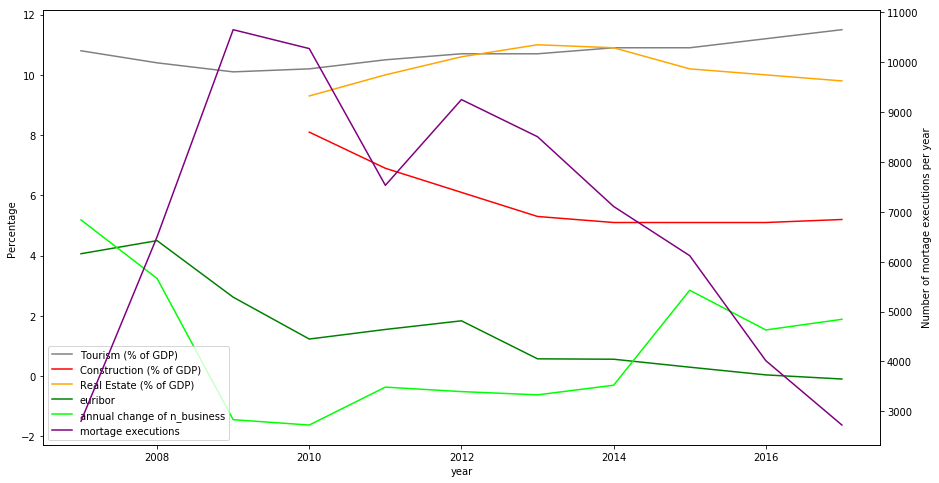

In [202]:
ax1=ES_gdp[ES_gdp['year']>2006].plot(x='year',y=['Tourism (% of GDP)','Construction (% of GDP)',
                                                 'Real Estate (% of GDP)','euribor','annual change of n_business'], 
                                     color=['grey','red','orange','green','lime'], kind='line', figsize=(15,8))

ax2=ES_gdp[ES_gdp['year']>2006].plot(x='year',y='mortage executions', color='purple',
                                     kind='line', figsize=(15,8), secondary_y=True, mark_right=False, ax=ax1)
ax1.set_ylabel("Percentage")
ax2.set_ylabel("Number of mortage executions per year")
plt.show()

Text(0.5,1,'Average number of intra-city migrations per year')

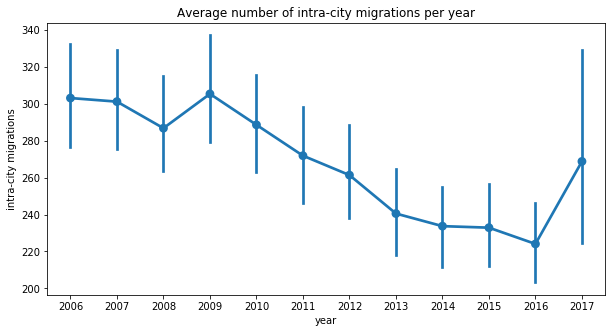

In [200]:
clean_migrations = clean_migrations.rename(columns={'count':'intra-city migrations'})
plt.figure(figsize=(10,5))
sns.pointplot(y='intra-city migrations',x='year',data=clean_migrations)
plt.title("Average number of intra-city migrations per year")

Text(0.5,1,'Evolution of the average prices per year')

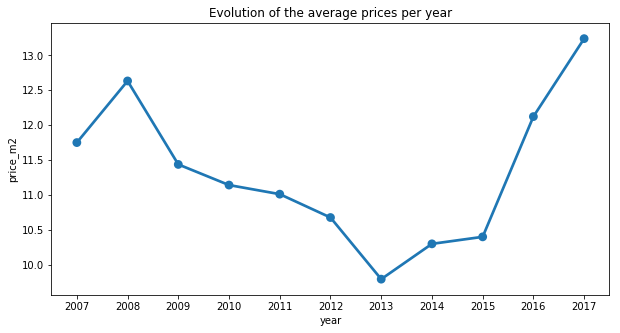

In [211]:
plt.figure(figsize=(10,5))
sns.pointplot(y='price_m2',x='year',data=rent_sel)
plt.title("Evolution of the average prices per year")

In [208]:
rent_sel

<bound method GroupBy.mean of <pandas.core.groupby.groupby.DataFrameGroupBy object at 0x10fb7f400>>